# Introduction
<p>The dataset is from <a href='https://www.kaggle.com/andrewmvd/data-analyst-jobs'> <span> Kaggle</span> </a>.</p>
<p>There are three questions of interest:</p>
<p>1.Find the best jobs by salary and company rating</p>
<p>2.Explore skills required in job descriptions</p>
<p>3.Predict salary based on company size</p>

Firstly, read in the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings 
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

step 1: load and clean data

In [2]:
# load dataset
df = pd.read_csv('./Dataset/DataAnalyst.csv',index_col=0)

df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\r\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\r\n\r\nProvides analytical and techni...,3.8,Visiting Nurse Service of New York\r\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\r\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\r\nRemote:Yes\r\n...,4.1,Celerity\r\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\r\n\r\nFanDuel Group is a ...,3.9,FanDuel\r\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [3]:
# 1)get columns and rows of dataset
print(df.shape)  # rows: 2253 columns: 15

# 2)check null value in columns
df.info() # not exists NaN in all columns

(2253, 15)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2253 entries, 0 to 2252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2253 non-null   object 
 1   Salary Estimate    2253 non-null   object 
 2   Job Description    2253 non-null   object 
 3   Rating             2253 non-null   float64
 4   Company Name       2252 non-null   object 
 5   Location           2253 non-null   object 
 6   Headquarters       2253 non-null   object 
 7   Size               2253 non-null   object 
 8   Founded            2253 non-null   int64  
 9   Type of ownership  2253 non-null   object 
 10  Industry           2253 non-null   object 
 11  Sector             2253 non-null   object 
 12  Revenue            2253 non-null   object 
 13  Competitors        2253 non-null   object 
 14  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 281.6+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028B991A6AC0>,
      dtype=object)

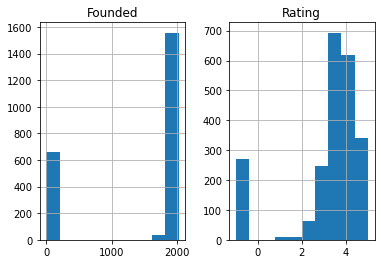

In [4]:
df.hist()

In [5]:
# 3)check abnormal value in columns one by one
# df.columns[0]]
print(df['Job Title'].dtype)
df['Job Title'].value_counts() # some job title could be classified into one type
df['Job Title'] = df['Job Title'].str.lower() # converts fields to lowercase for easy categorization: such as data analyst and DATA ANALYST are the same 
df['Job Title'].value_counts()[:50]   # checkout the top 50 job title 

object


data analyst                                                                        411
senior data analyst                                                                  92
junior data analyst                                                                  30
business data analyst                                                                28
sr. data analyst                                                                     21
data analyst ii                                                                      17
data quality analyst                                                                 17
data analyst junior                                                                  17
data governance analyst                                                              16
lead data analyst                                                                    15
data reporting analyst                                                               13
financial data analyst          

In [6]:
# Unify the duplicate type
df = df.replace('sr. data analyst','senior data analyst')
df = df.replace('sr data analyst','senior data analyst')
df = df.replace('data analyst junior','junior data analyst')  
df = df.replace('quality data analyst','data quality analyst')
df = df.replace('business data analyst','data business analyst')
df = df.replace('data reporting analyst','reporting data analyst')
df['Job Title'].value_counts()[:50]  

data analyst                                                                        411
senior data analyst                                                                 122
junior data analyst                                                                  47
data business analyst                                                                31
data quality analyst                                                                 21
data analyst ii                                                                      17
reporting data analyst                                                               16
data governance analyst                                                              16
lead data analyst                                                                    15
financial data analyst                                                               12
data analyst iii                                                                     11
data analyst i                  

In [7]:
# df.columns[1]
print(df['Salary Estimate'].dtype)
df['Salary Estimate'].unique() # need to repace -1 into np.nan
df['Salary Estimate'] = df['Salary Estimate'].replace('-1',np.nan)
df['Salary Estimate'].value_counts(dropna=False)
df['Salary Estimate'].isnull().mean() * 100 # only exists 1 missing value, so I decide to drop this data
df[df['Salary Estimate'].isnull()]  # the row that contain missing value
df.drop(index=2149,inplace=True)    

object


In [8]:
# split salary estimate into lower and upper columns
s = df["Salary Estimate"].str.split(" ",n= 1,expand=True)
sr = s[0].str.split('-',expand=True,n=1)
df['lower_salary'] = sr[0].str.replace('$','')
df['lower_salary'] = df['lower_salary'].str.replace('K','000')
df['upper_salary'] = sr[1].str.replace('$','')
df['upper_salary'] = df['upper_salary'].str.replace('K','000')

# convert data type
df['upper_salary'] = df['upper_salary'].astype('int')
df['lower_salary'] = df['lower_salary'].astype('int')

# add new column 'average_salary'
df['average_salary'] = (df['upper_salary'] + df['lower_salary']) / 2

# delete column
df = df.drop(columns=['Salary Estimate', 'upper_salary', 'lower_salary'])

In [9]:
# df.columns[2]
print(df['Job Description'].dtype)
df['Job Description'].value_counts(dropna=False)
df['Job Description'].isnull().mean()   # no missing values

object


0.0

In [10]:
# df.columns[3]
print(df['Rating'].dtype)
df['Rating'].unique()
df['Rating'] = df['Rating'].replace(-1,np.nan)
print(df['Rating'].isnull().mean())
df['Rating'].value_counts(dropna=False)
df[df['Rating'].isnull()]  # delay cleaning

float64
0.12078152753108348


,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,average_salary
11,data analyst,BulbHead is currently seeking a Data Analyst t...,NaN,BulbHead,"Fairfield, NJ",-1,1 to 50 employees,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,-1,51500.0
21,data science analyst,"Job Description\r\nOur client, a music streami...",NaN,MUSIC & Entertainment,"New York, NY","Marina del Rey, CA",Unknown,-1,Company - Public,-1,-1,Unknown / Non-Applicable,-1,-1,51500.0
34,data analyst (games),Carry1st is the leading mobile game publisher ...,NaN,Carry1st,"New York, NY",-1,-1,-1,-1,-1,-1,-1,-1,-1,66500.0
36,data business analyst,"At Clear Street, we are disrupting the institu...",NaN,Clear Street,"New York, NY","New York, NY",51 to 200 employees,2018,Company - Public,-1,-1,$1 to $5 million (USD),-1,-1,66500.0
40,"business analyst, data platforms",Company Description\r\n\r\nPinto is building t...,NaN,Pinto,"New York, NY","New York, NY",1 to 50 employees,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,-1,66500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,data analyst,Role Data Analyst Duration12+ months Location ...,NaN,"TechAspect Solutions, Inc. dba TA Digital","Centennial, CO",-1,-1,-1,-1,-1,-1,-1,-1,-1,70000.0
2202,financial data analyst,Position:Financial Data AnalystJob Description...,NaN,Black Knight Financial Technology Solutions,"Denver, CO",-1,-1,-1,-1,-1,-1,-1,-1,-1,70000.0
2239,senior contract data analyst,OverviewAmyx is seeking to hire a Senior Contr...,NaN,"Amyx, Iinc.","Aurora, CO",-1,-1,-1,-1,-1,-1,-1,-1,-1,91000.0
2246,"technical business analyst (sql, data analytic...",Spiceorb is looking for Technical Business Ana...,NaN,Spiceorb,"Denver, CO",-1,-1,-1,-1,-1,-1,-1,-1,-1,91000.0


In [11]:
# df.columns[4]
print(df['Company Name'].dtype)
df['Company Name'].unique()
# only keep the company name
df['Company Name'].str.split('\r\n',n=1,expand=True)  
df['Company Name'] = df['Company Name'].str.split('\r\n',n=1,expand=True)[0]
print(df['Company Name'].isnull().mean())
df[df['Company Name'].isnull()]
df.drop(index=1860,inplace=True)

object
0.0004440497335701599


In [12]:
# df.columns[5]
print(df['Location'].dtype)
df['Location'].value_counts(dropna=False)
print(df['Location'].isnull().mean())
# only keep the city name
df['Location'] = df['Location'].str.split(',',expand=True)[0]

object
0.0


In [13]:
# df.columns[6]
print(df['Headquarters'].dtype)
df['Headquarters'].unique()
df['Headquarters'].value_counts(dropna=False)
df['Headquarters'] = df['Headquarters'].replace('-1',np.nan)
print(df['Headquarters'].isnull().mean())
df[df['Headquarters'].isnull()] # delay cleaning

object
0.0759662372278987


,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,average_salary
11,data analyst,BulbHead is currently seeking a Data Analyst t...,NaN,BulbHead,Fairfield,NaN,1 to 50 employees,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,-1,51500.0
34,data analyst (games),Carry1st is the leading mobile game publisher ...,NaN,Carry1st,New York,NaN,-1,-1,-1,-1,-1,-1,-1,-1,66500.0
55,reporting data analyst,OverviewThe Data Analyst is a new position in ...,NaN,NADAP NYS INC.,New York,NaN,-1,-1,-1,-1,-1,-1,-1,-1,66500.0
68,data science analyst,Job Details\r\n\r\nLevel\r\n\r\nExperienced\r\...,NaN,Greater New York Mutual Insurance Companies (GNY),New York,NaN,-1,-1,-1,-1,-1,-1,-1,-1,69500.0
90,data analyst,NYU Grossman School of Medicine is one of the ...,NaN,NYU Langone Medical Center,New York,NaN,-1,-1,-1,-1,-1,-1,-1,-1,69000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,data analyst,Role Data Analyst Duration12+ months Location ...,NaN,"TechAspect Solutions, Inc. dba TA Digital",Centennial,NaN,-1,-1,-1,-1,-1,-1,-1,-1,70000.0
2202,financial data analyst,Position:Financial Data AnalystJob Description...,NaN,Black Knight Financial Technology Solutions,Denver,NaN,-1,-1,-1,-1,-1,-1,-1,-1,70000.0
2239,senior contract data analyst,OverviewAmyx is seeking to hire a Senior Contr...,NaN,"Amyx, Iinc.",Aurora,NaN,-1,-1,-1,-1,-1,-1,-1,-1,91000.0
2246,"technical business analyst (sql, data analytic...",Spiceorb is looking for Technical Business Ana...,NaN,Spiceorb,Denver,NaN,-1,-1,-1,-1,-1,-1,-1,-1,91000.0


In [14]:
# df.columns[7]
print(df['Size'].dtype)
df['Size'].unique()
df['Size'] = df['Size'].replace('-1',np.nan)

object


In [15]:
# df.columns[8]
print(df['Founded'].dtype)
df['Founded'].unique()
df['Founded'] = df['Founded'].replace(-1,np.nan)
df['Founded'].value_counts(dropna=False)
print(df['Founded'].isnull().mean())
df[df['Founded'].isnull()] # delay cleaning

int64
0.2927587738782763


,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,average_salary
11,data analyst,BulbHead is currently seeking a Data Analyst t...,NaN,BulbHead,Fairfield,NaN,1 to 50 employees,NaN,Company - Private,-1,-1,Unknown / Non-Applicable,-1,-1,51500.0
15,sustainability data analyst,Job Description\r\nRole Description\r\n\r\nSus...,3.6,CodeGreen Solutions,New York,"New York, NY",1 to 50 employees,NaN,Company - Private,Building & Personnel Services,Business Services,Unknown / Non-Applicable,-1,-1,51500.0
21,data science analyst,"Job Description\r\nOur client, a music streami...",NaN,MUSIC & Entertainment,New York,"Marina del Rey, CA",Unknown,NaN,Company - Public,-1,-1,Unknown / Non-Applicable,-1,-1,51500.0
23,data analyst,Haven Life is an insurtech innovator at MassMu...,3.5,Andiamo,New York,"Warren, MI",201 to 500 employees,NaN,Company - Private,Casual Restaurants,"Restaurants, Bars & Food Services",$1 to $5 million (USD),-1,-1,51500.0
24,entry level / jr. data analyst,Dash Technologies is an industry leading softw...,3.8,Dash Technologies Inc,New York,"Columbus, OH",1 to 50 employees,NaN,Unknown,-1,-1,Unknown / Non-Applicable,-1,-1,51500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2244,"data security analyst, sr",Contract Duration: 9 Months\r\n\r\nLocation: D...,2.5,"Avacend, Inc.",Denver,"Alpharetta, GA",51 to 200 employees,NaN,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,-1,-1,91000.0
2246,"technical business analyst (sql, data analytic...",Spiceorb is looking for Technical Business Ana...,NaN,Spiceorb,Denver,NaN,NaN,NaN,-1,-1,-1,-1,-1,-1,91000.0
2247,marketing/communications - data analyst-marketing,Job Description\r\nJob Title: Marketing/Commun...,4.1,APN Software Services Inc.,Broomfield,"Newark, CA",51 to 200 employees,NaN,Company - Private,Computer Hardware & Software,Information Technology,$25 to $50 million (USD),-1,-1,91000.0
2248,rqs - ihha - 201900004460 -1q data security an...,Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.",Denver,"Alpharetta, GA",51 to 200 employees,NaN,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,-1,-1,91000.0


In [16]:
# df.columns[9]
print(df['Type of ownership'].dtype)
df['Type of ownership'].unique()
df['Type of ownership'] = df['Type of ownership'].replace('-1',np.nan)
print(df['Type of ownership'].isnull().mean())
df[df['Type of ownership'].isnull()] # delay cleaning

object
0.07196801421590404


,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,average_salary
34,data analyst (games),Carry1st is the leading mobile game publisher ...,NaN,Carry1st,New York,NaN,NaN,NaN,NaN,-1,-1,-1,-1,-1,66500.0
55,reporting data analyst,OverviewThe Data Analyst is a new position in ...,NaN,NADAP NYS INC.,New York,NaN,NaN,NaN,NaN,-1,-1,-1,-1,-1,66500.0
68,data science analyst,Job Details\r\n\r\nLevel\r\n\r\nExperienced\r\...,NaN,Greater New York Mutual Insurance Companies (GNY),New York,NaN,NaN,NaN,NaN,-1,-1,-1,-1,-1,69500.0
90,data analyst,NYU Grossman School of Medicine is one of the ...,NaN,NYU Langone Medical Center,New York,NaN,NaN,NaN,NaN,-1,-1,-1,-1,-1,69000.0
109,data analyst,"Data Analyst\r\n\r\nJersey City, NJ\r\n\r\n12+...",NaN,Vertex Intel Systems,Jersey City,NaN,NaN,NaN,NaN,-1,-1,-1,-1,-1,69000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,data analyst,Role Data Analyst Duration12+ months Location ...,NaN,"TechAspect Solutions, Inc. dba TA Digital",Centennial,NaN,NaN,NaN,NaN,-1,-1,-1,-1,-1,70000.0
2202,financial data analyst,Position:Financial Data AnalystJob Description...,NaN,Black Knight Financial Technology Solutions,Denver,NaN,NaN,NaN,NaN,-1,-1,-1,-1,-1,70000.0
2239,senior contract data analyst,OverviewAmyx is seeking to hire a Senior Contr...,NaN,"Amyx, Iinc.",Aurora,NaN,NaN,NaN,NaN,-1,-1,-1,-1,-1,91000.0
2246,"technical business analyst (sql, data analytic...",Spiceorb is looking for Technical Business Ana...,NaN,Spiceorb,Denver,NaN,NaN,NaN,NaN,-1,-1,-1,-1,-1,91000.0


In [17]:
# df.columns[10]
print(df['Industry'].dtype)
df['Industry'].unique()
df['Industry'] = df['Industry'].replace('-1',np.nan)
print(df['Industry'].isnull().mean())
df[df['Industry'].isnull()]  # delay cleaning

object
0.15637494446912484


,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,average_salary
11,data analyst,BulbHead is currently seeking a Data Analyst t...,NaN,BulbHead,Fairfield,NaN,1 to 50 employees,NaN,Company - Private,NaN,-1,Unknown / Non-Applicable,-1,-1,51500.0
21,data science analyst,"Job Description\r\nOur client, a music streami...",NaN,MUSIC & Entertainment,New York,"Marina del Rey, CA",Unknown,NaN,Company - Public,NaN,-1,Unknown / Non-Applicable,-1,-1,51500.0
24,entry level / jr. data analyst,Dash Technologies is an industry leading softw...,3.8,Dash Technologies Inc,New York,"Columbus, OH",1 to 50 employees,NaN,Unknown,NaN,-1,Unknown / Non-Applicable,-1,-1,51500.0
32,data analyst,Job Description:\r\nLegal experience is requir...,3.5,Pozent,New York,"Piscataway, NJ",1 to 50 employees,NaN,Contract,NaN,-1,Less than $1 million (USD),-1,-1,66500.0
34,data analyst (games),Carry1st is the leading mobile game publisher ...,NaN,Carry1st,New York,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,-1,66500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,"mdg functional data analyst-greenwood village, co",MDG Functional Data Analyst\r\nLocation: Green...,5.0,Georgia IT Inc.,Greenwood Village,"Alpharetta, GA",1 to 50 employees,NaN,Company - Private,NaN,-1,Less than $1 million (USD),-1,-1,78500.0
2234,"data analyst 3, customer experience - centennial",Business Unit: Summary Responsible for working...,3.6,Comcast,Englewood,"Philadelphia, PA",10000+ employees,1963.0,Company - Public,NaN,-1,$10+ billion (USD),"AT&T, Verizon",-1,78500.0
2239,senior contract data analyst,OverviewAmyx is seeking to hire a Senior Contr...,NaN,"Amyx, Iinc.",Aurora,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,-1,91000.0
2246,"technical business analyst (sql, data analytic...",Spiceorb is looking for Technical Business Ana...,NaN,Spiceorb,Denver,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,-1,91000.0


In [18]:
# df.columns[11]
print(df['Sector'].dtype)
df['Sector'].unique()
df['Sector'] = df['Sector'].replace('-1',np.nan)
print(df['Sector'].isnull().mean())
df[df['Sector'].isnull()]  # delay cleaning

object
0.15637494446912484


,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,average_salary
11,data analyst,BulbHead is currently seeking a Data Analyst t...,NaN,BulbHead,Fairfield,NaN,1 to 50 employees,NaN,Company - Private,NaN,NaN,Unknown / Non-Applicable,-1,-1,51500.0
21,data science analyst,"Job Description\r\nOur client, a music streami...",NaN,MUSIC & Entertainment,New York,"Marina del Rey, CA",Unknown,NaN,Company - Public,NaN,NaN,Unknown / Non-Applicable,-1,-1,51500.0
24,entry level / jr. data analyst,Dash Technologies is an industry leading softw...,3.8,Dash Technologies Inc,New York,"Columbus, OH",1 to 50 employees,NaN,Unknown,NaN,NaN,Unknown / Non-Applicable,-1,-1,51500.0
32,data analyst,Job Description:\r\nLegal experience is requir...,3.5,Pozent,New York,"Piscataway, NJ",1 to 50 employees,NaN,Contract,NaN,NaN,Less than $1 million (USD),-1,-1,66500.0
34,data analyst (games),Carry1st is the leading mobile game publisher ...,NaN,Carry1st,New York,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,66500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,"mdg functional data analyst-greenwood village, co",MDG Functional Data Analyst\r\nLocation: Green...,5.0,Georgia IT Inc.,Greenwood Village,"Alpharetta, GA",1 to 50 employees,NaN,Company - Private,NaN,NaN,Less than $1 million (USD),-1,-1,78500.0
2234,"data analyst 3, customer experience - centennial",Business Unit: Summary Responsible for working...,3.6,Comcast,Englewood,"Philadelphia, PA",10000+ employees,1963.0,Company - Public,NaN,NaN,$10+ billion (USD),"AT&T, Verizon",-1,78500.0
2239,senior contract data analyst,OverviewAmyx is seeking to hire a Senior Contr...,NaN,"Amyx, Iinc.",Aurora,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,91000.0
2246,"technical business analyst (sql, data analytic...",Spiceorb is looking for Technical Business Ana...,NaN,Spiceorb,Denver,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,91000.0


In [19]:
# df.columns[12]
print(df['Revenue'].dtype)
df['Revenue'].unique()
# replace billion to million
df['Revenue'] = df['Revenue'].replace('-1','Unknown / Non-Applicable')
df = df.replace('$1 to $2 billion (USD)','$1000 to $2000 million')
df = df.replace('$2 to $5 billion (USD)','$2000 to $5000 million')
df = df.replace('$5 to $10 billion (USD)','$5000 to $10000 million')
df = df.replace('$10+ billion (USD)','more than $10000 million')
df = df.replace('$500 million to $1 billion (USD)','$500 to $10000 million')
df['Revenue'] = df['Revenue'].str.split('(',expand=True)[0]
df['Revenue'].value_counts()

object


Unknown / Non-Applicable    777
$100 to $500 million        218
$50 to $100 million         199
more than $10000 million    189
$10 to $25 million          132
$2000 to $5000 million      129
$1 to $5 million            111
$25 to $50 million          109
Less than $1 million         93
$1000 to $2000 million       87
$500 to $10000 million       79
$5 to $10 million            72
$5000 to $10000 million      56
Name: Revenue, dtype: int64

In [20]:
# df.columns[13]
df['Competitors'].unique()
df['Competitors'] = df['Competitors'].replace('-1',np.nan)
print(df['Competitors'].isnull().mean())
df[df['Competitors'].isnull()]  # the missing value is too much, so I decide to delete this column
df = df.drop(columns = ['Competitors'])

0.7685473123056419


In [21]:
# df.columns[14]
print(df['Easy Apply'].dtype)
df['Easy Apply'].value_counts()
df['Easy Apply'] = df['Easy Apply'].replace('True',1)

object


In [22]:
# Now, the missing values for all columns
print(df.isnull().mean().sort_values() * 100)

Job Title             0.000000
Job Description       0.000000
Company Name          0.000000
Location              0.000000
Revenue               0.000000
Easy Apply            0.000000
average_salary        0.000000
Size                  7.196801
Type of ownership     7.196801
Headquarters          7.596624
Rating               12.039094
Industry             15.637494
Sector               15.637494
Founded              29.275877
dtype: float64


In [23]:
# after cleaning data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2251 entries, 0 to 2252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2251 non-null   object 
 1   Job Description    2251 non-null   object 
 2   Rating             1980 non-null   float64
 3   Company Name       2251 non-null   object 
 4   Location           2251 non-null   object 
 5   Headquarters       2080 non-null   object 
 6   Size               2089 non-null   object 
 7   Founded            1592 non-null   float64
 8   Type of ownership  2089 non-null   object 
 9   Industry           1899 non-null   object 
 10  Sector             1899 non-null   object 
 11  Revenue            2251 non-null   object 
 12  Easy Apply         2251 non-null   object 
 13  average_salary     2251 non-null   float64
dtypes: float64(3), object(11)
memory usage: 263.8+ KB


1.Find the best jobs by salary and company rating

(array([129., 138., 304., 322., 133., 108.,  67.,  35.,   1.,  13.]),
 array([ 33500.,  45150.,  56800.,  68450.,  80100.,  91750., 103400.,
        115050., 126700., 138350., 150000.]),
 <a list of 10 Patch objects>)

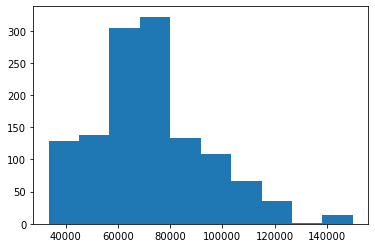

In [24]:
# find the best jobs with high salary and high rating

# group the dataset by 'job title'
group_job = df.groupby('Job Title')

# create a new df to store grouped data
new_df = pd.DataFrame()
new_df['average_salary'] = group_job.average_salary.mean()
new_df.dropna(inplace=True)

plt.hist(new_df['average_salary'])  # most job salary cluster in the range of [60000, 80000] 

(array([  6.,   4.,   5.,  36.,  69., 257., 307., 234., 106., 106.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

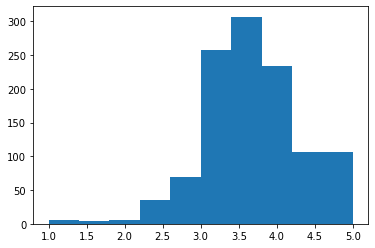

In [25]:
new_df['rating'] = group_job.Rating.mean()
new_df.dropna(inplace=True)
plt.hist(new_df['rating'])  # most job rating cluster in the range of [3, 4] 

       average_salary       rating
count     1130.000000  1130.000000
mean     72310.042647     3.683159
std      21500.495146     0.635796
min      33500.000000     1.000000
25%      59000.000000     3.300000
50%      69500.000000     3.700000
75%      84625.000000     4.100000
max     150000.000000     5.000000


,average_salary,rating
Job Title,,
ai insights data analyst,150000.0,5.0
data scientist/analyst - wilbur labs,138500.0,5.0
data studio analyst,138500.0,5.0
finance & accounting data analyst,120000.0,4.8
lims master data analyst,122500.0,4.6
"senior data analyst, member services",126000.0,4.8
senior hr data analyst,150000.0,4.6
senior marketing data analyst (real estate),113000.0,4.6
sr digital marketing data analyst (paid social),122500.0,5.0


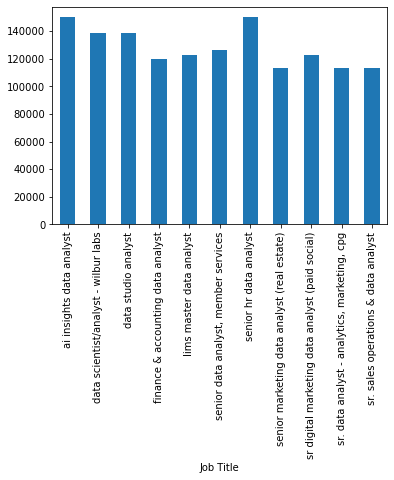

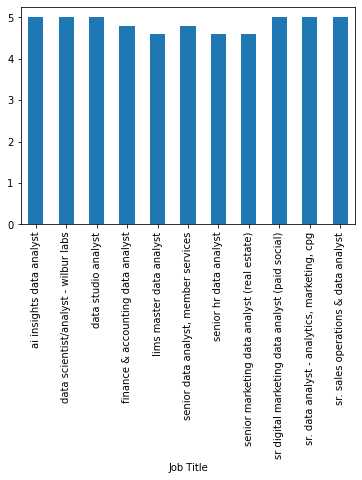

In [26]:
print(new_df.describe())
# choose the best jobs with average_salary > 110000 and rating > 4.5
result = new_df[(new_df['average_salary'] >= 110000) & (new_df['rating'] > 4.5)]  
display(result)
result['average_salary'].plot.bar()
plt.savefig('./average_salary.png')
plt.show()
result['rating'].plot.bar()
plt.savefig('./rating.png')
plt.show()

In [27]:
# the best jobs
best_jobs = list(result.index)
print(best_jobs)

['ai insights data analyst', 'data scientist/analyst - wilbur labs', 'data studio analyst', 'finance & accounting data analyst', 'lims master data analyst', 'senior data analyst, member services', 'senior hr data analyst', 'senior marketing data analyst (real estate)', 'sr digital marketing data analyst (paid social)', 'sr. data analyst - analytics, marketing, cpg', 'sr. sales operations & data analyst']


Answer 1:
<p>ai insights data analyst</p>
<p>data scientist/analyst - wilbur labs</p>
<p>data studio analyst</p>
<p>finance & accounting data analyst</p>
<p>lims master data analyst</p>
<p>senior data analyst, member services</p>
<p>senior hr data analyst</p>
<p>senior marketing data analyst (real estate)</p>
<p>sr digital marketing data analyst (paid social)</p>
<p>sr. data analyst - analytics, marketing, cpg</p>
<p>sr. sales operations & data analyst</p>
<p>From the data, senior level about data science, marketing, hr would be a great job</p>

2.Explore skills required in job descriptions

In [28]:
# come up with common skills
skills = ['python','sql','git','gitHub','coding','programming skills','problem-solving ability','logical reasoning skills','sas','stata', 'word','powerpoint',
         'excel','access','bi','tableau','communication skills','multitask','visualization','analytical skills','modeling','mindmapping','microsoft office'
         'organizational skills']
df['Job Description'] = df['Job Description'].str.lower()

In [29]:
skills_list = []
for i in df['Job Description']:
    for j in skills:
        if j in i:
            skills_list.append(j)         
result = Counter(skills_list)
print(result)

Counter({'bi': 2062, 'sql': 1387, 'excel': 1352, 'communication skills': 723, 'python': 637, 'tableau': 620, 'access': 544, 'visualization': 517, 'modeling': 433, 'sas': 411, 'analytical skills': 327, 'git': 298, 'word': 271, 'powerpoint': 193, 'coding': 149, 'multitask': 42, 'programming skills': 37, 'stata': 30, 'problem-solving ability': 7, 'logical reasoning skills': 3, 'mindmapping': 1})


Answer 2:
<p>skills required in job descriptions:</p>
 BI,SQL,Excel,Communication skills,Python/R,Tableau,Access,Modeling,Statistical software,Office software,programming.
These are the most mentioned skills.

3.Predict salary based on company revenue

In [30]:
# delete missing value
df['Size'].unique()
df['Size'] = df['Size'].replace('Unknown',np.nan)
df.dropna(subset=['Size'],axis=0,inplace=True)

# reset level of company size
df = df.replace('1 to 50 employees',1)
df = df.replace('51 to 200 employees',2)
df = df.replace('201 to 500 employees',3)
df = df.replace('501 to 1000 employees',4)
df = df.replace('1001 to 5000 employees',5)
df = df.replace('5001 to 10000 employees',6)
df = df.replace('10000+ employees',7)

df['Size'].value_counts(dropna=False)
print(df.groupby('Size').average_salary.mean())  
df.corr()  # The correlation between average_salary and size is not strong.

Size
1    72711.815562
2    72521.428571
3    71192.771084
4    71988.151659
5    72869.252874
6    74201.030928
7    69957.333333
Name: average_salary, dtype: float64


,Rating,Size,Founded,average_salary
Rating,1.000000,-0.195661,0.175831,0.041501
Size,-0.195661,1.000000,-0.541133,-0.024997
Founded,0.175831,-0.541133,1.000000,0.095760
average_salary,0.041501,-0.024997,0.095760,1.000000


Now I don't konw how to predict salary because the correlation is too small.
But I decide still to put data into Line_model for exercising.

In [31]:
df.dropna(inplace=True)
X = df[['Size']]
y = df['average_salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)
lm_model = LinearRegression(normalize=True) 
lm_model.fit(X_train, y_train) 
y_hat = lm_model.predict(X_test)
r2_score(y_test,y_hat)

-0.0020905270060089798